# Evaluate results from running mutual information calculations

## Import relevant packages

In [15]:
import os
import sys
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter
from sportypy.surfaces.basketball import NBACourt

# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath('.'))

# Add the 'scripts' directory to the Python path
scripts_dir = os.path.join(current_dir, 'scripts')
sys.path.append(scripts_dir)

from adaptability_calculator import AdaptabilityCalculator

## Get players of interest and their information

In [8]:
players_of_interest = pd.read_csv("../auxilliary_data/players_of_interest.csv")

## Evaluate player position heatmap for a player

### Get vectors across all games

In [14]:
adaptability_calculator = AdaptabilityCalculator()
player_id = 2544
games = os.listdir("../clean_game_data")

# Get vectors across all games
abbrev_team = players_of_interest[players_of_interest["Player ID"] == player_id]["Team"].iloc[0]
player_games = [game for game in games if abbrev_team in game]
events = []
for game_name in tqdm(player_games, desc="Game download loop", leave=False):
    game_data = adaptability_calculator.read_game_data(game_name, folder_name="../clean_game_data")
    if adaptability_calculator.get_team_id(player_id, game_data[0]) is not None:
        events.extend(game_data)
lineups, position_vectors, ball_possessions, lineup_stats = adaptability_calculator.get_vectors_from_events(player_id, events, include_ball=True, min_games=None, min_events=None, min_moments=10_000)

### Plot all lineups heatmap

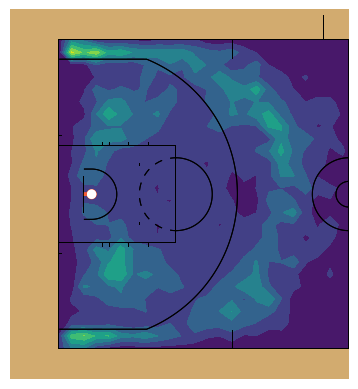

In [16]:
# Convert lists to numpy arrays for easier handling
x_positions = np.array([vector[0] for vector in position_vectors])
y_positions = np.array([vector[1] for vector in position_vectors])

court = NBACourt(x_trans=47, y_trans=25)
fig, ax = plt.subplots(1, 1)
court.draw(ax=ax, display_range="defense")
court.contour(
    x_positions,
    y_positions,
    binsize=2
)

### Plot heatmaps for each lineup

frozenset({2544, 202681, 2747, 202684, 201567})
frozenset({203521, 2544, 2747, 202684, 201567})
frozenset({203521, 2544, 202389, 2747, 201567})
frozenset({2544, 202389, 202681, 2747, 201567})
frozenset({2544, 202389, 2747, 2590, 201567})
frozenset({2544, 2747, 202684, 2590, 201567})
frozenset({203521, 2544, 202684, 2590, 201567})
frozenset({2210, 2544, 202389, 2590, 201567})
frozenset({203521, 2210, 2544, 202684, 201567})


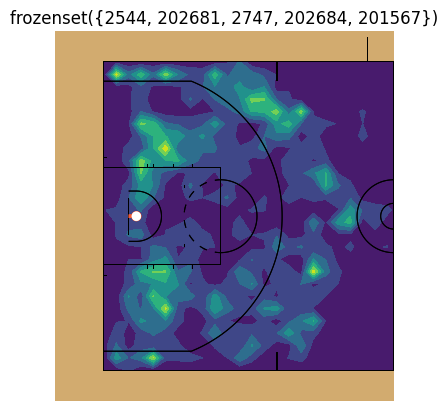

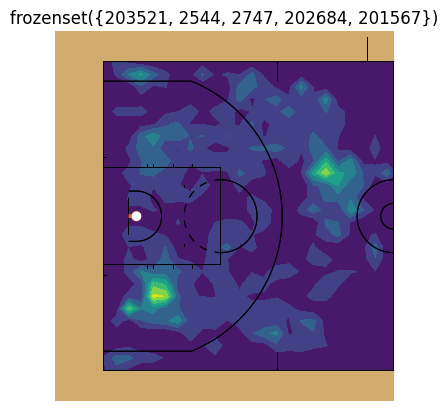

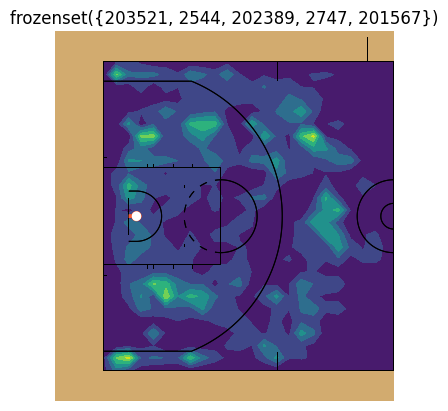

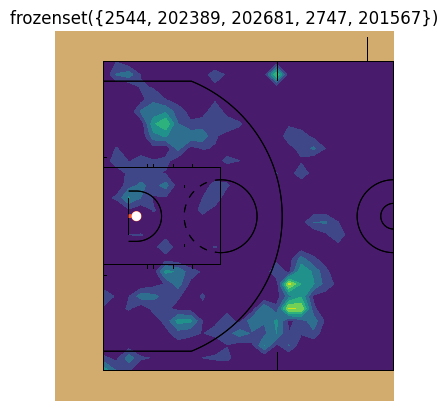

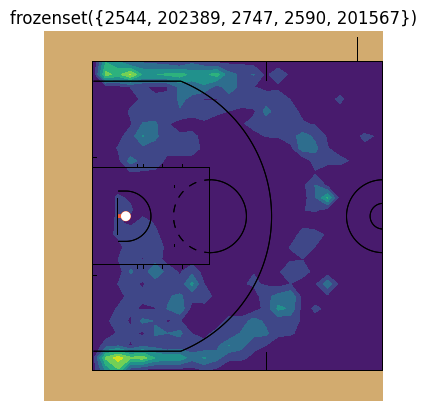

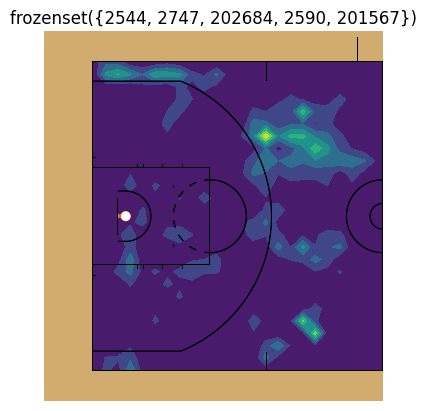

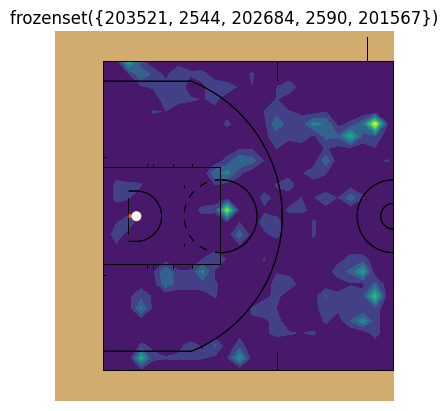

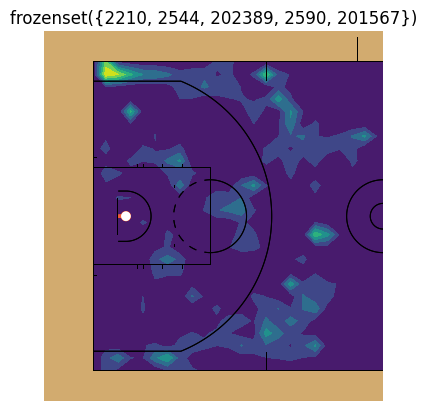

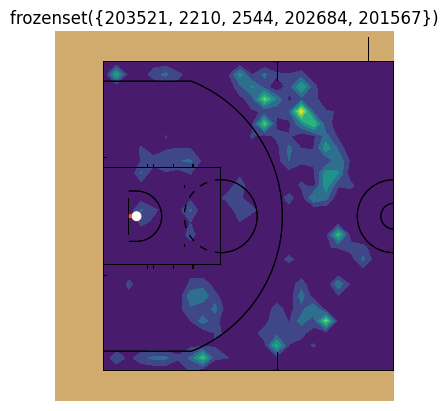

In [18]:
counter = Counter(lineups)
for unique_lineup in counter.keys():
    print(unique_lineup)
    indices = [i for i, lineup in enumerate(lineups) if lineup==unique_lineup]
    x_positions = np.array([position_vectors[i][0] for i in indices])
    y_positions = np.array([position_vectors[i][1] for i in indices])
    court = NBACourt(x_trans=47, y_trans=25)
    fig, ax = plt.subplots(1, 1)
    court.draw(ax=ax, display_range="defense")
    court.contour(
        x_positions,
        y_positions,
        binsize=2,
    )
    ax.set_title(str(unique_lineup))